In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip install pandas numpy matplotlib seaborn


In [ ]:
import pandas as pd

# Load the dataset
titanic_data = pd.read_csv('/train.csv')

# Show the first few rows
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Get info about the dataset
titanic_data.info()

# Get summary statistics
titanic_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


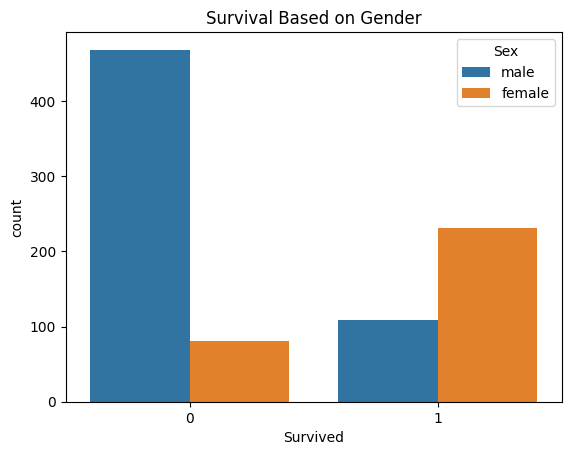

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for survival rate based on gender
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.title('Survival Based on Gender')
plt.show()


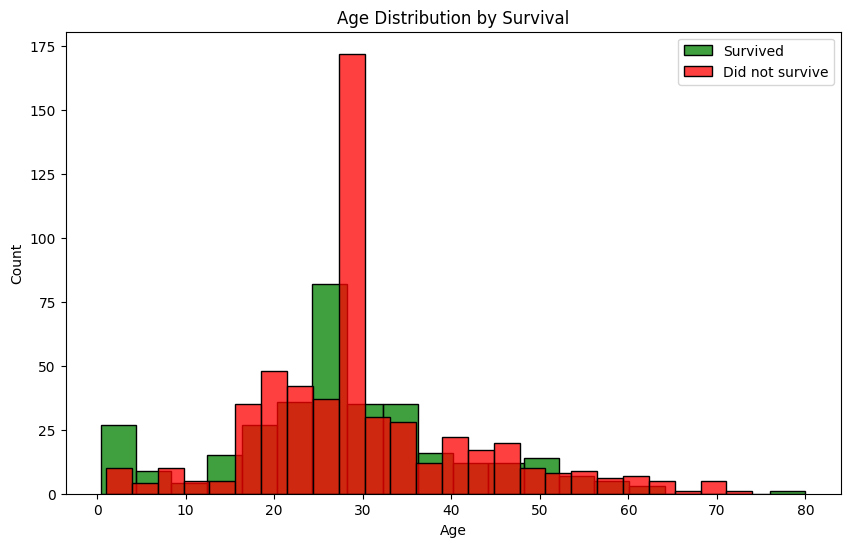

In [ ]:
# Histogram of age for survivors vs non-survivors
plt.figure(figsize=(10,6))
sns.histplot(titanic_data[titanic_data['Survived'] == 1]['Age'], kde=False, color='green', label='Survived')
sns.histplot(titanic_data[titanic_data['Survived'] == 0]['Age'], kde=False, color='red', label='Did not survive')
plt.legend()
plt.title('Age Distribution by Survival')
plt.show()


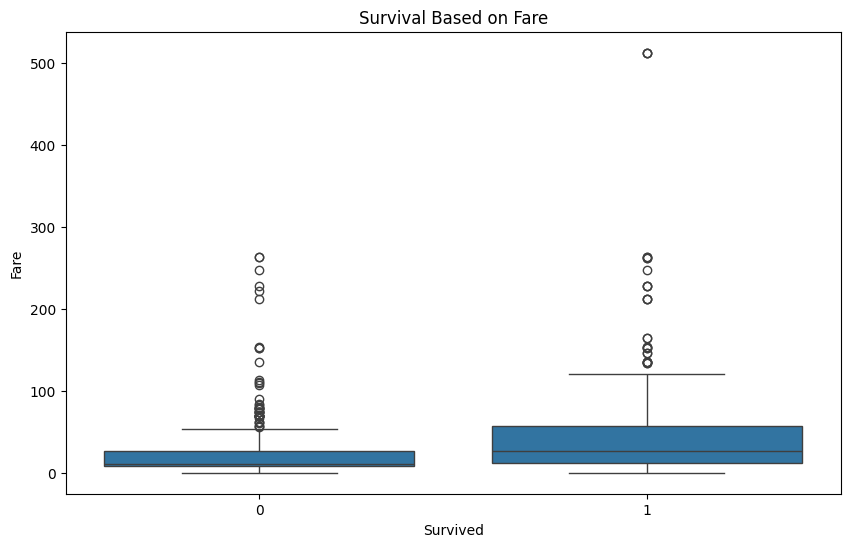

In [ ]:
# Boxplot of fare by survival
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Fare', data=titanic_data)
plt.title('Survival Based on Fare')
plt.show()


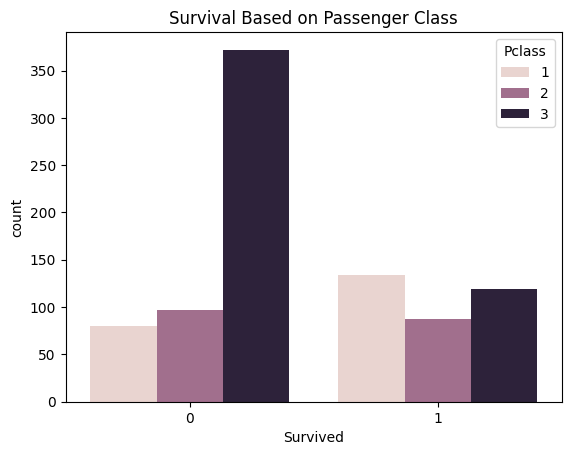

In [ ]:
# Countplot for survival rate based on passenger class
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.title('Survival Based on Passenger Class')
plt.show()


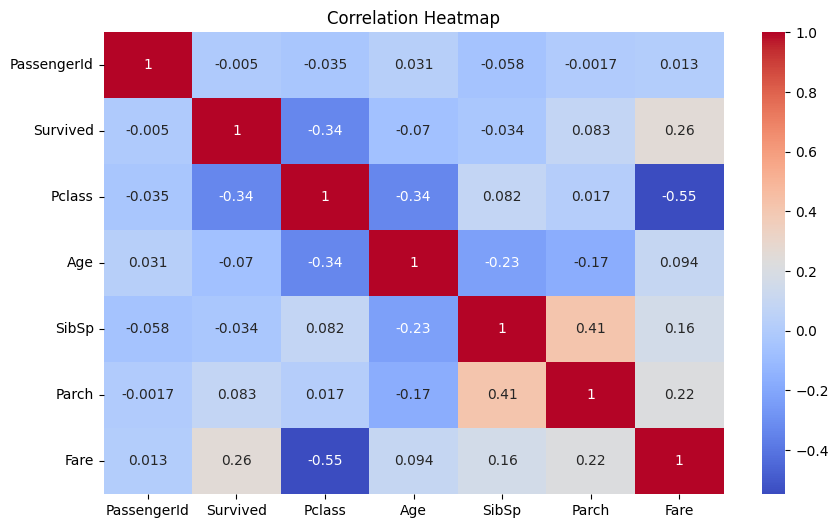

In [ ]:
# Selecting only numeric columns for correlation
numeric_columns = titanic_data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:

# Check the column names
print(titanic_data.columns)

# Check for missing data again
print(titanic_data.isnull().sum())


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
# Fill missing Age values with the median of the Age column
if 'Age' in titanic_data.columns:
    titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Drop rows where Embarked is missing
if 'Embarked' in titanic_data.columns:
    titanic_data.dropna(subset=['Embarked'], inplace=True)

# Drop the Cabin column (optional) due to a large number of missing values
if 'Cabin' in titanic_data.columns:
    titanic_data.drop('Cabin', axis=1, inplace=True)


In [ ]:

# Check if there are any missing values left
print(titanic_data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
